#**Classificação de sinais de trânsito**

##**Definição do problema**


<div align = "justify"><p>Nesse projeto, pretende-se elaborar uma rede neural profunda capaz de classificar sinais de trânsito. Utilizaremos a arquitetura LeNet para o desenvolvimento dessa aplicação.</p>

<p>A base de dados contém 43 sinais de trânsito diferentes, ou seja, 43 classes diferentes para classificação. A base de dados possui 51839 imagens com dimensão 32x32.</p></div>

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

##**Resolução**

###**Etapa 1 - Importação das bibliotecas**

In [ ]:
# Importação das bibliotecas necessárias para o desenvolvimento do projeto
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
# Acessar recursos do sistema operações
import os
#Acessar imagens
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
# Executar leituras de arquivos
import pickle
# Trabalhar com arquivos compactados
import zipfile
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0'

###**Etapa 2  - Importação da base de dados**

In [ ]:
# Conexão com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importação da base de dados 
path = '/content/drive/My Drive/Colab Notebooks/DEEP LEARNING/Projeto #8: Classificação de sinais de trãnsito/traffic-signs-data.zip'
# Extração do arquivo compactado (r -> leitura do arquivo)
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
# Acesso do arquivo train.p e definição da variável train
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
# Acesso do arquivo test.p e definição da variável test  
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)

# Acesso do arquivo valid.p e definição da variável valid
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [ ]:
# Visualizar a variável train
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
# Separação dos dados com base nos índices
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [ ]:
# Visualizar o formato de y_train
X_train.shape

(34799, 32, 32, 3)

Temos 34799 imagens 32x32 com 3 canais (coloridas) para treinamento.

In [ ]:
# Visualizar o formato de y_train
y_train.shape

(34799,)

In [ ]:
# Visualizar o formato de X_test
X_test.shape

(12630, 32, 32, 3)

Temos 12630 imagens 32x32 com 3 canais (coloridas) para teste.

In [ ]:
# Visualizar o formato de X_validation
X_validation.shape

(4410, 32, 32, 3)

Temos 4410 imagens 32x32 com 3 canais (coloridas) para validação.

###**Etapa 3 - Visualização dos dados**

1

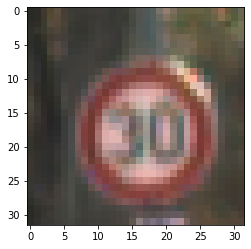

In [ ]:
# Definir a variável i com um número aleatório
i = 3100
# Mostrar a imagem na posição i da base de dados de treinamento
plt.imshow(X_train[i])
y_train[i]

36

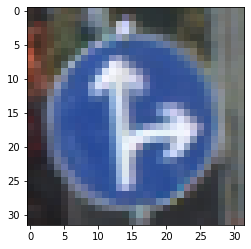

In [ ]:
# Definir uma variável i com um número aleatório
i = 3001
# Mostrar a imagem na posição i da base de dados de teste
plt.imshow(X_test[i])
y_test[i]

8

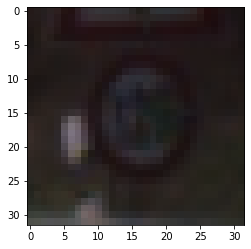

In [ ]:
# Definir uma variável i com um número aleatório
i = 2100
# Mostrar a imagem na posição i da base de dados de validação
plt.imshow(X_validation[i])
y_validation[i]

###**Etapa 4 - Preparação dos dados**

In [ ]:
# Importação da função shuffle para misturarmos os dados 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Conversão das imagens para a escala de cinza
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [ ]:
# Visualizar o formato de X_train_gray
X_train_gray.shape

(34799, 32, 32, 1)

Temos 34799 imagens com 32x32 com 1 canal (escala de cinza) para treinamento.

In [ ]:
# Visualizar o formato de X_test_gray
X_test_gray.shape

(12630, 32, 32, 1)

Temos 12630 imagens com 32x32 com 1 canal (escala de cinza) para teste.

In [ ]:
# Visualizar o formato de X_validation_gray
X_validation_gray.shape

(4410, 32, 32, 1)

Temos 4410 imagens com 32x32 com 1 canal (escala de cinza) para validação.

In [ ]:
# Normalização das bases de dados (entre -1 e 1) 
X_train_gray_norm = (X_train_gray - 128) / 128 # metade de 255
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [ ]:
# Visualizar valor máximo na base de dados de treinamento
np.max(X_train_gray_norm)

0.9921875

In [ ]:
# Visualizar valor mínimo na base de dados de treinamento
np.min(X_train_gray_norm)

-0.9713541666666666

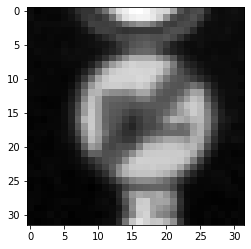

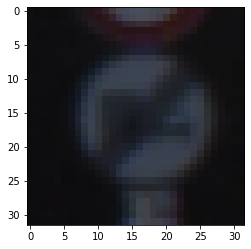

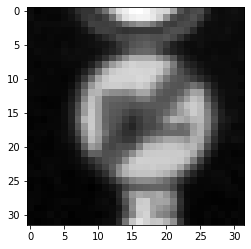

In [ ]:
# Definir a variável i com um número aleatório
i = 60

# Mostrar imagem na escala de cinza da posição i na base de treinamento
plt.imshow(X_train_gray[i].squeeze(), cmap='gray') # squeeze() = reshape [redimensionamento das imagens para 32x32]
plt.figure()

# Mostrar imagem original na posição i na base de treinamento
plt.imshow(X_train[i])
plt.figure()

# Mostrar imagem normalizada da posição i na base de treinamento
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray');

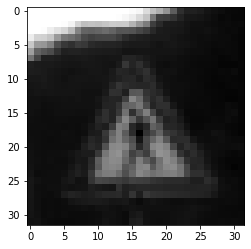

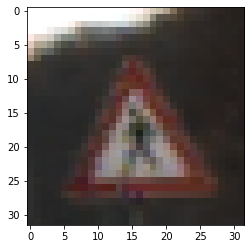

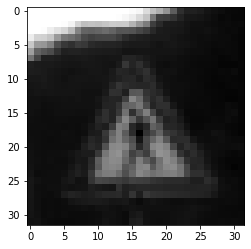

In [ ]:
# Definir a variável i com um número aleatório
i = 610

# Mostrar imagem na escala de cinza da posição i na base de teste
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()

# Mostrar imagem original cinza da posição i na base de treinamento
plt.imshow(X_test[i])
plt.figure()

# Mostrar imagem normalizada da posição i na base de teste
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray');

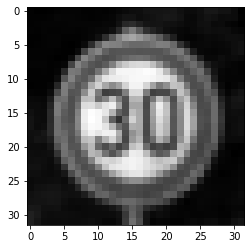

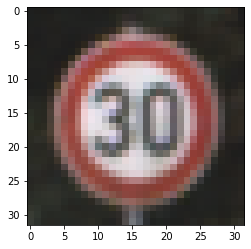

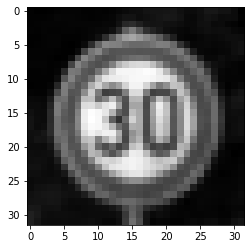

In [ ]:
# Definir a variável i com um número aleatório
i = 500

# Mostrar imagem na escala de cinza da posição i na base de validação
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()

# Mostrar imagem original da posição i na base de validação
plt.imshow(X_validation[i])
plt.figure()

# Mostrar imagem normalizada da posição i na base de validação
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray');

###**Etapa 5 - Criação do modelo e treinamento**

**ARQUITETURA LeNet**

- 1º PASSO: PRIMEIRA CAMADA CONVOLUCIONAL #1
    - Entrada = 32x32x1
    - Saída = 28x28x6
    - Saída = (Entrada-filtros+1)/Stride* => (32-5+1)/1=28
    - Utilizamos um filtro 5x5 com input depth de 3 e output depth de 6
    - Aplicação da função de ativação RELU para Saída
    - Pooling para Saída, Entrada = 28x28x6 e Saída = 14x14x6

- 2º PASSO: SEGUNDA CAMADA CONVOLUCIONAL #2
    - Entrada = 14x14x6
    - Saída = 10x10x16
    - Camada 2: Camada convolucional com saída = 10x10x16
    - Saída = (Entrada-filtros+1)/strides => 10 = 14-5+1/1
    - Aplicação da função de ativação RELU para Saída
    - Pooling com Entrada = 10x10x16 e Saída = 5x5x16

- 3º PASSO: FLATTENING 
    - Flattening na rede neural com Entrada = 5x5x16 e Saída = 400

- 4º PASSO : FULLY CONNECTED LAYER
    - Camada 3: Fully Connected layer com Entrada = 400 e Saída = 120
    - Aplicação da função de ativação RELU para Saída

- 5º PASSO: 
Outra FULLY CONNECTED LAYER
    - Camada 4: Fully Connected Layer com Entrada = 120 e Saída = 84
    - Aplicação a função de ativação RELU para Saída

- 6º PASSO: FULLY CONNECTED LAYER
    - Camada 5: Fully Connected layer com Entrada = 84 e Saída = 43
    - - Aplicação a função de ativação SOFTMAX para Saída

In [ ]:
# Criação da rede neural profunda com a base na arquitetura LeNet

# Importação de camadas e modelos do tensorflow.keras
from tensorflow.keras import layers, models

# Criação do modelo sequencial
LeNet = models.Sequential()

# 1º PASSO
LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

# 2º PASSO
LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

# 3º PASSO
LeNet.add(layers.Flatten())

# 4º PASSO
LeNet.add(layers.Dense(120, activation='relu'))

# 5º PASSO
LeNet.add(layers.Dense(84, activation='relu'))

# 6º PASSO
LeNet.add(layers.Dense(43, activation='softmax'))

# Visualizar sumário da rede criada
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
# Compilação do modelo
# Função de custo 'sparse_categorical_crossentropy'
# Algoritmo de otimização 'Adam' (Gradiente Descendente Estocástico)
# Acurácia como métrica da avaliação do treinamento
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# Treinamento do modelo
# Armazenar os resultados do treinamento na variável history
# Definir 50 épocas para o treinamento
# Definir batch size em 500 (ajuste dos pesos).
# Aplicar as bases de dados de validação
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 1s 16ms/step - loss: 3.0500 - accuracy: 0.2095 - val_loss: 2.4345 - val_accuracy: 0.3363
Epoch 2/50
70/70 [==============================] - 1s 9ms/step - loss: 1.5057 - accuracy: 0.5742 - val_loss: 1.3397 - val_accuracy: 0.6236
Epoch 3/50
70/70 [==============================] - 1s 9ms/step - loss: 0.8718 - accuracy: 0.7507 - val_loss: 0.9751 - val_accuracy: 0.7068
Epoch 4/50
70/70 [==============================] - 1s 9ms/step - loss: 0.6348 - accuracy: 0.8205 - val_loss: 0.8472 - val_accuracy: 0.7578
Epoch 5/50
70/70 [==============================] - 1s 9ms/step - loss: 0.5114 - accuracy: 0.8586 - val_loss: 0.7810 - val_accuracy: 0.7726
Epoch 6/50
70/70 [==============================] - 1s 9ms/step - loss: 0.4309 - accuracy: 0.8812 - val_loss: 0.7362 - val_accuracy: 0.7991
Epoch 7/50
70/70 [==============================] - 1s 10ms/step - loss: 0.3693 - accuracy: 0.8996 - val_loss: 0.7227 - val_accuracy: 0.8011
Epoch 8/50
70/70 [

###**Etapa 6 - Avaliação do modelo**

In [ ]:
# Executar avaliação das previsões da RNA para os dados de teste (X_test_gray_norm e y_test). Para isso, utilizamos a função evaluate
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.3074 - accuracy: 0.8657
Test Accuracy: 0.8657165765762329


**Acurácia: 0.86**

In [ ]:
# Visualizar dicionário de history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Atribuir os valores de history para variáveis específicas
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Visualizar os valores de acurácia na validação em cada época
val_accuracy

[0.3362811803817749,
 0.6235827803611755,
 0.7068027257919312,
 0.75782310962677,
 0.7725623846054077,
 0.7990929484367371,
 0.8011338114738464,
 0.8045351505279541,
 0.8104308247566223,
 0.8222222328186035,
 0.837188184261322,
 0.8151927590370178,
 0.841269850730896,
 0.8337868452072144,
 0.8367347121238708,
 0.8387755155563354,
 0.8467119932174683,
 0.8467119932174683,
 0.8494331240653992,
 0.8464852571487427,
 0.8424036502838135,
 0.8419501185417175,
 0.8365079164505005,
 0.8326530456542969,
 0.8451247215270996,
 0.841269850730896,
 0.8478457927703857,
 0.8478457927703857,
 0.8365079164505005,
 0.8501133918762207,
 0.859183669090271,
 0.8571428656578064,
 0.8365079164505005,
 0.8501133918762207,
 0.8510203957557678,
 0.841269850730896,
 0.8299319744110107,
 0.8424036502838135,
 0.8485260605812073,
 0.8426303863525391,
 0.8530611991882324,
 0.856916069984436,
 0.8521541953086853,
 0.8575963973999023,
 0.8551020622253418,
 0.8553287982940674,
 0.8517006635665894,
 0.8562358021736145,


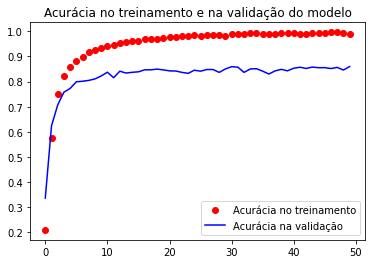

In [ ]:
# Visualização da acurácia no treinamento e na validação
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Acurácia no treinamento')
plt.plot(epochs, val_accuracy, 'b', label='Acurácia na validação')
plt.title('Acurácia no treinamento e na validação do modelo')
plt.legend();

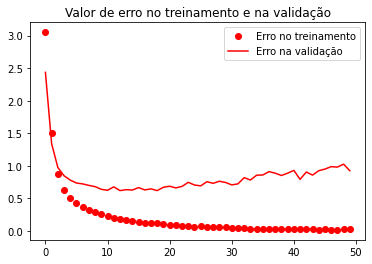

In [ ]:
# Visualização do valor de erro no treinamento e na validação
plt.plot(epochs, loss, 'ro', label='Erro no treinamento')
plt.plot(epochs, val_loss, 'r', label='Erro na validação')
plt.title('Valor de erro no treinamento e na validação')
plt.legend();

In [ ]:
# Executar as previsões das classes para a base de dados de teste
predicted_classes = LeNet.predict_classes(X_test_gray_norm)

# Atribuir à variável y_true os valores reais da base de dados de teste
y_true = y_test

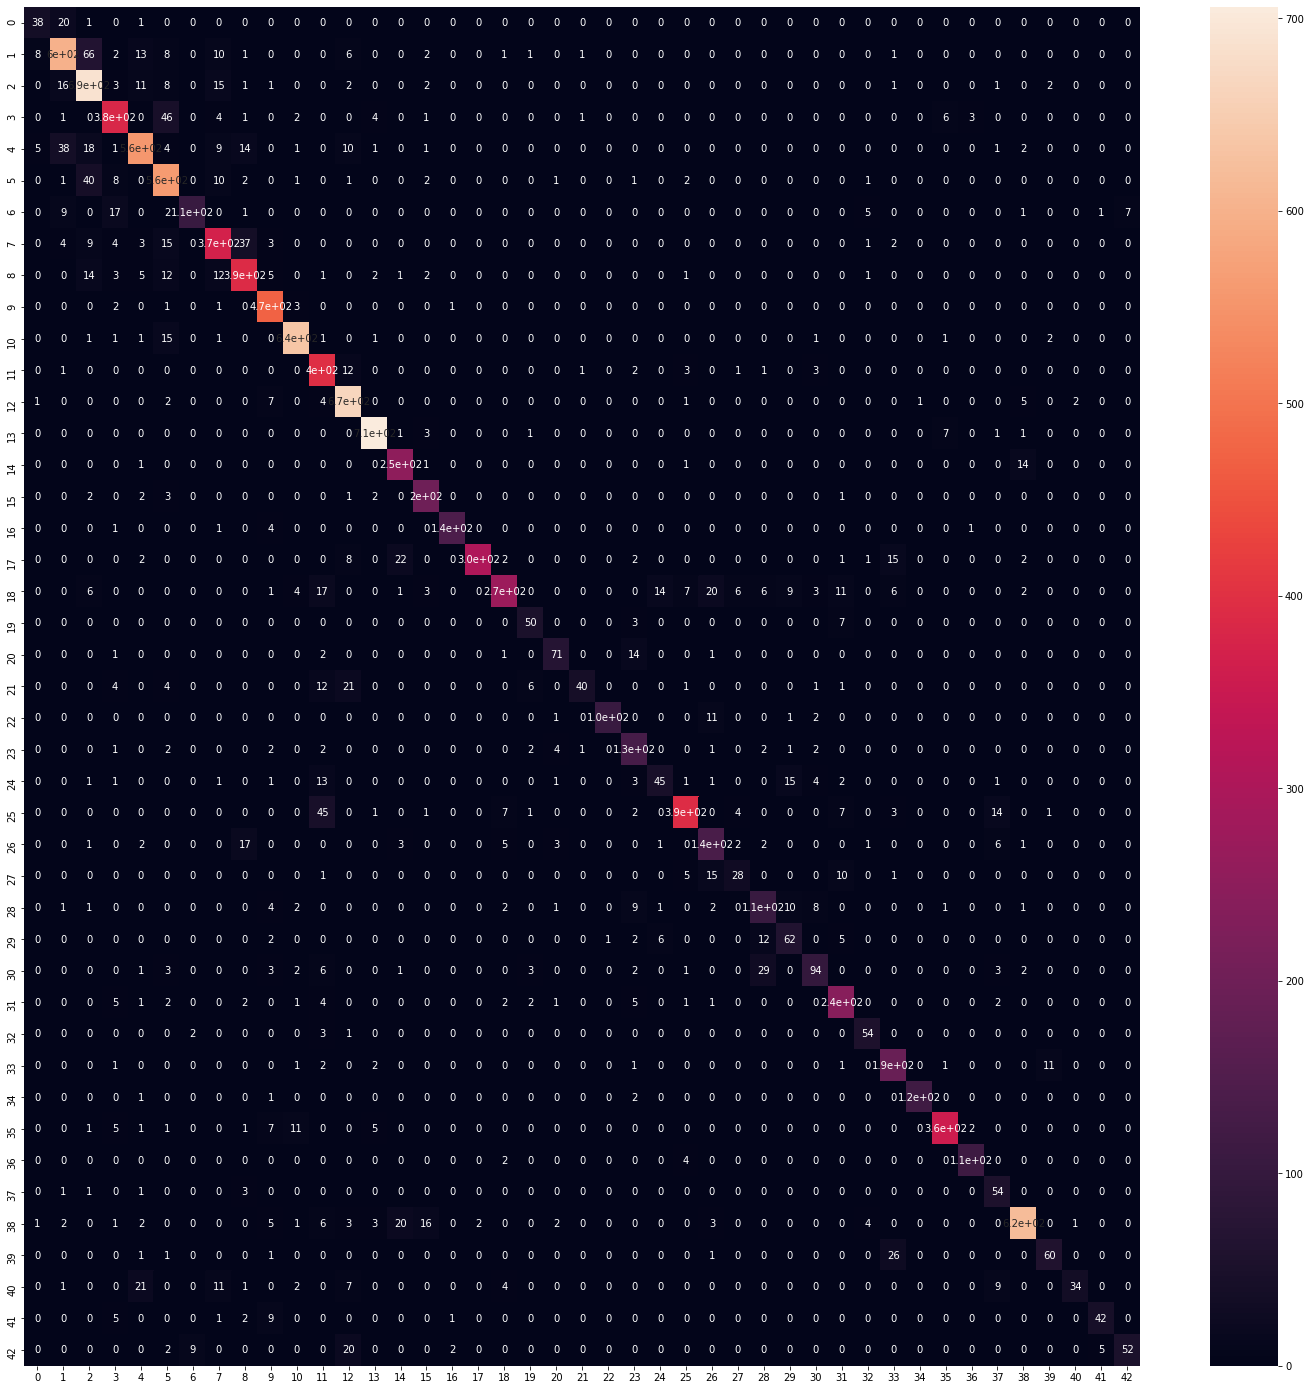

In [ ]:
# Importação da matriz de confusão
from sklearn.metrics import confusion_matrix

# Visualizar um Heatmap da matriz de confusão
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

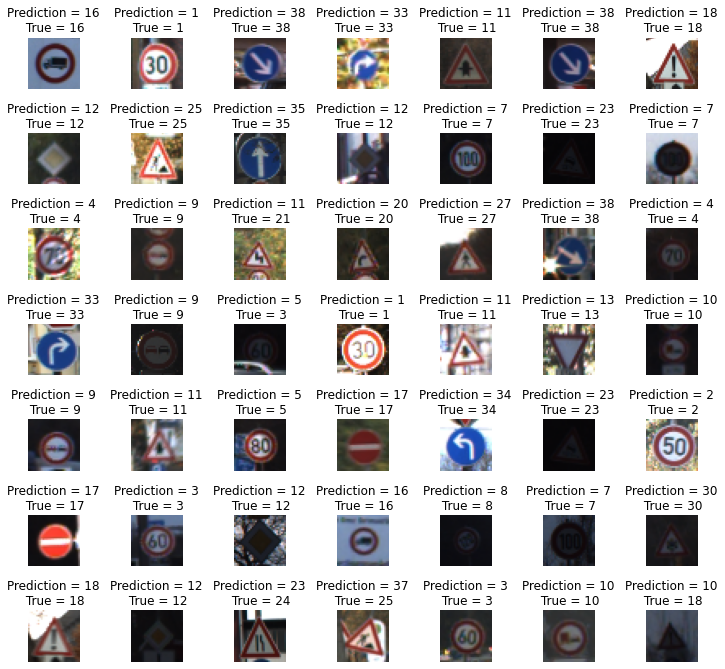

In [ ]:
# Visualização de 49 imagens previstas pelo modelo para fins de comparação com as imagens reais

# Definir dimensões para exibir as imagens em grid
L = 7
W = 7

# Criação dos subplots para exibir imagens com dimensão 12x12
fig, axes = plt.subplots(L, W, figsize = (12, 12))

# Transformação do formato de matriz em veto
axes = axes.ravel()

# Geração de valores aleatórios
for i in np.arange(0, L*W):

    # Mostrar imagem dentro do eixo
    axes[i].imshow(X_test[i])
    # Definir classe prevista e a classe real como título da imagem exibida
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    # Retirar informações dos eixos, mostrar somente as imagens
    axes[i].axis('off')
    
# Definir espaçamento horizontal 
plt.subplots_adjust(wspace = 1)    